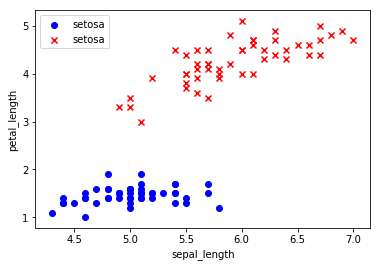

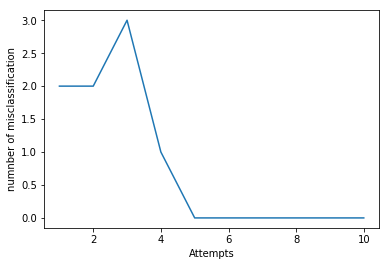

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self,X,y):
        self.w_ = np.zeros(1+X.shape[1])
        self.errors = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi,target in zip(X,y):
                update = self.eta*(target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] = update
                errors += int(update !=0.0)
            self.errors.append(errors)
            
        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0,1,-1)


df = pd.read_csv('iris.data',header = None)
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa',-1,1)
X = df.iloc[0:100,[0,2]].values
pl.scatter(X[:50,0],X[:50,1], color = 'blue', marker = 'o', label = 'setosa')
pl.scatter(X[50:100,0], X[50:100,1], color = 'red', marker = 'x', label = 'setosa')
pl.xlabel('sepal_length')
pl.ylabel('petal_length')
pl.legend(loc = 'upper left')

pl.show()

ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X,y)

pl.plot(range(1,len(ppn.errors) + 1), ppn.errors)

pl.xlabel('Attempts')
pl.ylabel('numnber of misclassification')
pl.show()

    